In [1]:
from typing import Dict, Optional
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from xcube.core.store import new_data_store
from xcube.core.select import select_variables_subset

## Prepare I/O directories

In [2]:
clip_repo_name = "clip_02_we_live_in_a_world_of_rising_seas"

In [3]:
from init_nb import ws_path, cliplib
clip_dir = ws_path / clip_repo_name
clip_data_dir = clip_dir / "data"
clip_cache_dir = clip_data_dir / "temp"
if not clip_cache_dir.exists():
    clip_cache_dir.mkdir()

Open CCI Open Data Portal store and list contents:

In [4]:
odp_store = new_data_store("cciodp")

In [5]:
# list(cz_store.get_data_ids())

## Open CCI Oceanic Indicators of Mean Sea Level Changes (MSL), Version 2.0

In [6]:
data_id = "esacci.SEALEVEL.mon.IND.MSL.multi-sensor.multi-platform.MERGED.2-0.r1"

In [7]:
odp_store.describe_data(data_id)

In [8]:
msl_dataset = odp_store.open_data(data_id)
msl_dataset

<xarray.Dataset>
Dimensions:                 (time: 276, lat: 720, lon: 1440, bnds: 2)
Coordinates:
  * lat                     (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                     (lon) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                    (time) datetime64[ns] 1993-01-16T12:00:00 ... 201...
    time_bnds               (time, bnds) datetime64[ns] dask.array<chunksize=(276, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    global_msl              (time) float32 dask.array<chunksize=(276,), meta=np.ndarray>
    global_msl_trend        float32 ...
    global_msl_trend_error  float32 ...
Attributes: (12/18)
    Conventions:                CF-1.7
    title:                      esacci.SEALEVEL.mon.IND.MSL.multi-sensor.mult...
    date_created:               2023-01-20T16:47:15.325860
    processing_level:           IND
    time_coverage_start:        1993-01-01T00:00:00
    time_coverage_end:          2016-01-01T00:00:00
    ...                         ...
    geospatial_lat_resolution:  0.25
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lat_units:       degrees_north
    geospatial_bounds_crs:      CRS84
    geospatial_bounds:          POLYGON((-180.0 -90.0, -180.0 90.0, 180.0 90....

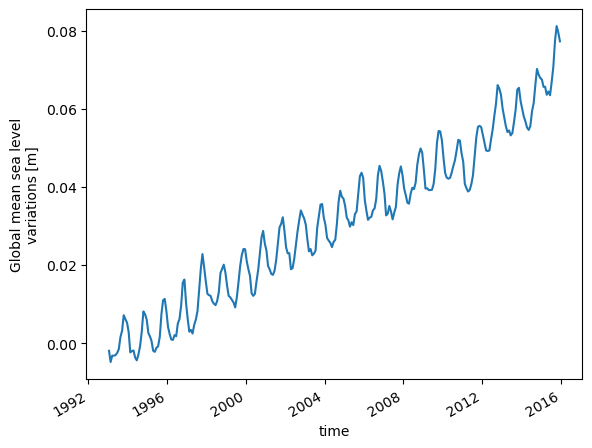

In [9]:
msl_dataset.global_msl.plot()

## Write CSV

In [10]:
msl_dataset.global_msl.to_dataframe().to_csv(f"{clip_data_dir}/global_msl.csv")

Read CSV to verify

In [11]:
pd.read_csv(f"{clip_data_dir}/global_msl.csv", index_col="time")

,global_msl
time,
1993-01-16 12:00:00,-0.001873
1993-02-15 00:00:00,-0.004756
1993-03-16 12:00:00,-0.003135
1993-04-16 00:00:00,-0.003122
1993-05-16 12:00:00,-0.002989
...,...
2015-08-16 12:00:00,0.070812
2015-09-16 00:00:00,0.077375
2015-10-16 12:00:00,0.081142


---

# Inspect other Sea Level Datasets

## CCI Time series of gridded Sea Level Anomalies (SLA), Version 2.0

In [12]:
data_id = "esacci.SEALEVEL.mon.L4.MSLA.multi-sensor.multi-platform.MERGED.2-0.r1"

In [13]:
odp_store.describe_data(data_id)

In [14]:
msla_dataset = odp_store.open_data(data_id)
msla_dataset

<xarray.Dataset>
Dimensions:      (n: 2, lat: 720, lon: 1440, time: 276, bnds: 2)
Coordinates:
    date_bounds  (n) float32 dask.array<chunksize=(2,), meta=np.ndarray>
  * lat          (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon          (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time         (time) datetime64[ns] 1993-01-16T12:00:00 ... 2015-12-16T12:...
    time_bnds    (time, bnds) datetime64[ns] dask.array<chunksize=(276, 2), meta=np.ndarray>
Dimensions without coordinates: n, bnds
Data variables:
    sla          (time, lat, lon) float32 dask.array<chunksize=(1, 720, 720), meta=np.ndarray>
Attributes: (12/18)
    Conventions:                CF-1.7
    title:                      esacci.SEALEVEL.mon.L4.MSLA.multi-sensor.mult...
    date_created:               2023-01-20T16:47:16.781229
    processing_level:           L4
    time_coverage_start:        1993-01-01T00:00:00
    time_coverage_end:          2016-01-01T00:00:00
    ...                         ...
    geospatial_lat_resolution:  0.25
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lat_units:       degrees_north
    geospatial_bounds_crs:      CRS84
    geospatial_bounds:          POLYGON((-180.0 -90.0, -180.0 90.0, 180.0 90....

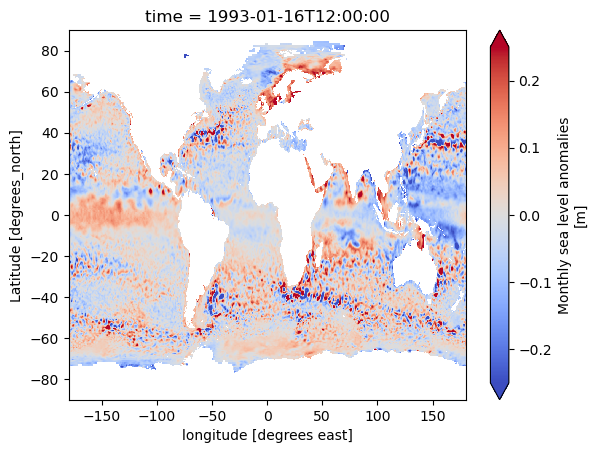

In [15]:
msla_dataset.sla.isel(time=0).plot.imshow(vmin=-0.25, vmax=+0.25, cmap="coolwarm")

## CCI Oceanic Indicators of Mean Sea Level Changes (MSLAMPH), Version 2.0

In [16]:
data_id = "esacci.SEALEVEL.mon.IND.MSLAMPH.multi-sensor.multi-platform.MERGED.2-0.r1"

In [17]:
odp_store.describe_data(data_id)

In [18]:
# mslamph_dataset = odp_store.open_data(data_id)
# raises ValueError: The truth value of a Array is ambiguous. Use a.any() or a.all().

# Oceanic Indicators of Mean Sea Level Changes (MSLTR), Version 2.0

In [19]:
data_id = "esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.multi-platform.MERGED.2-0.r1"

In [20]:
odp_store.describe_data(data_id)

In [21]:
msltr_dataset = odp_store.open_data(data_id)
msltr_dataset

<xarray.Dataset>
Dimensions:                (lat: 720, time: 276, lon: 1440, bnds: 2)
Coordinates:
  * lat                    (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                    (lon) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                   (time) datetime64[ns] 1993-01-16T12:00:00 ... 2015...
    time_bnds              (time, bnds) datetime64[ns] dask.array<chunksize=(276, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    local_msl_trend        (time, lat, lon) float32 dask.array<chunksize=(276, 45, 45), meta=np.ndarray>
    local_msl_trend_error  (time, lat, lon) float32 dask.array<chunksize=(276, 45, 45), meta=np.ndarray>
Attributes: (12/18)
    Conventions:                CF-1.7
    title:                      esacci.SEALEVEL.mon.IND.MSLTR.multi-sensor.mu...
    date_created:               2023-01-20T16:47:18.125230
    processing_level:           IND
    time_coverage_start:        1993-01-01T00:00:00
    time_coverage_end:          2016-01-01T00:00:00
    ...                         ...
    geospatial_lat_resolution:  0.25
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lat_units:       degrees_north
    geospatial_bounds_crs:      CRS84
    geospatial_bounds:          POLYGON((-180.0 -90.0, -180.0 90.0, 180.0 90....

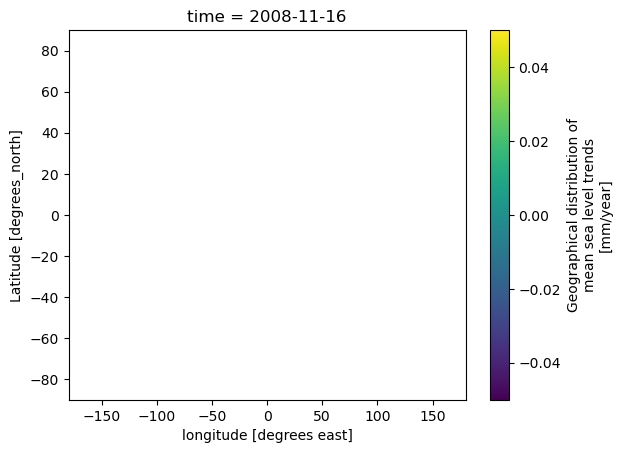

In [22]:
msltr_dataset.local_msl_trend.isel(time=190).plot.imshow()

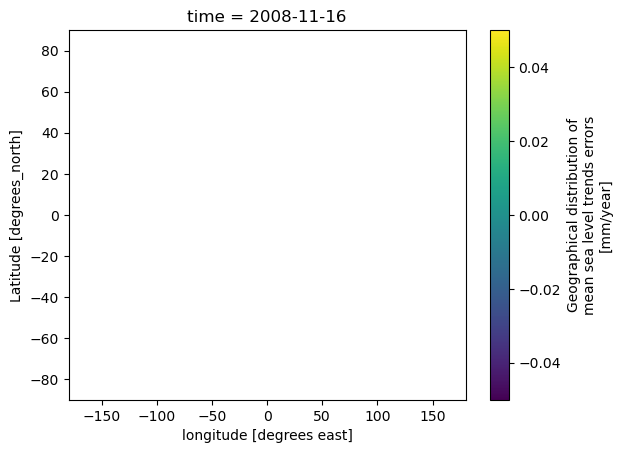

In [23]:
msltr_dataset.local_msl_trend_error.isel(time=190).plot.imshow()